##Enabling GPU for Effective Computation

In [ ]:
import torch

In [ ]:
#checks for gpu support
torch.cuda.is_available()

True

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Running on GPU:", device)
else:
    print("CUDA is not available. Using CPU.")

Running on GPU: cuda


###Importing Necessary Libraries
Numpy for numpy array operations over the dataset <br>
pandas for manipulating the Dataset <br>
Matplotlib & seaborn for Visualizing the dataset <br>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/My Drive/RL_Research/'
file_path=folder_path+'FINCROP.xlsx'

In [ ]:
df=pd.read_excel(file_path)
df.head()

,Domain,Complaint/ Opinion,Complaint Label,Complaint_Cause,Severity level,Sentiment,Emotion
0,Transaction Fail,Can someone tell me if transaction fail betwee...,1,transaction fail between merchant and Bank due...,No explicit reproach,negative,sadness
1,Transaction Fail,@LICIndiaForever @Paytmcare @Paytm As part of ...,1,balance deducted but payment status shows fail,No explicit reproach,negative,sadness
2,Transaction Fail,@ICICIBank_Care This is something very serious...,1,not able to use imobile app,No explicit reproach,negative,anger
3,Transaction Fail,@RBI @ICICIBank_Care @ICICIBank @CRED_support ...,1,payment seems a fraud transaction,Blame,negative,anger
4,Transaction Fail,Fraud transaction through CRED for SBI C-Card ...,1,Fraud transaction through CRED,Accusation,negative,surprise


In [ ]:
df.shape

(6280, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Domain              6280 non-null   object
 1   Complaint/ Opinion  6280 non-null   object
 2   Complaint Label     6280 non-null   int64 
 3   Complaint_Cause     6276 non-null   object
 4   Severity level      6280 non-null   object
 5   Sentiment           6280 non-null   object
 6   Emotion             6280 non-null   object
dtypes: int64(1), object(6)
memory usage: 343.6+ KB


Let's analyze the dscriptive statistics of the dataset

In [ ]:
df.describe()

,Complaint Label
count,6280.000000
mean,0.501274
std,0.500038
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


##Handling Missing values

In [ ]:
df.isnull().any()

Domain                False
Complaint/ Opinion    False
Complaint Label       False
Complaint_Cause        True
Severity level        False
Sentiment             False
Emotion               False
dtype: bool

In [ ]:
df.isnull().sum()

Domain                0
Complaint/ Opinion    0
Complaint Label       0
Complaint_Cause       4
Severity level        0
Sentiment             0
Emotion               0
dtype: int64

The above we can observe that there are 4 missing values in Complaint_Cause Column. Here we are replacing those null values with the most frequently repeated value of that column .i.e., by using mode()

In [ ]:
df["Complaint_Cause"].mode()

0    no cause
Name: Complaint_Cause, dtype: object

In [ ]:
df["Complaint_Cause"].fillna("no cause", inplace=True)

In [ ]:
df.isnull().any()

Domain                False
Complaint/ Opinion    False
Complaint Label       False
Complaint_Cause       False
Severity level        False
Sentiment             False
Emotion               False
dtype: bool

In [ ]:
df["Domain"].unique()

array(['Transaction Fail', 'Netbanking', 'Mortgage', 'Loan', 'Debit Card',
       'Customer Service', 'Credit card', 'ATM', 'Interest Rate', 'Stock',
       'Salary', 'Transaction Failure', 'Tax', 'Credit Card',
       'Financial Apps', 'Consumer transaction complaints', 'Transaction',
       'Retail Banking', 'Crypto', 'Refund', 'Retail banking', 'Economy',
       'Debit card', 'Stocks and investment', 'Financial Policies'],
      dtype=object)

In [ ]:
len(df["Domain"].unique())

25

In [ ]:
df["Domain"].value_counts()

Domain
Customer Service                   697
Economy                            631
Stocks and investment              604
Debit card                         567
Transaction Failure                469
Credit Card                        464
Consumer transaction complaints    429
Loan                               377
Crypto                             293
Financial Policies                 237
Debit Card                         217
Transaction                        215
Transaction Fail                   210
Credit card                        188
Stock                              124
Refund                             113
Financial Apps                      90
Tax                                 77
ATM                                 75
Salary                              64
Retail banking                      61
Netbanking                          38
Interest Rate                       29
Mortgage                            10
Retail Banking                       1
Name: count, dtype

In [ ]:
df["Complaint Label"].value_counts()

Complaint Label
1    3148
0    3132
Name: count, dtype: int64

In [ ]:
df["Severity level"].value_counts()

Severity level
Non-Complaint           3132
No explicit reproach    1547
Blame                    875
Disapproval              604
Accusation               122
Name: count, dtype: int64

In [ ]:
df["Sentiment"].value_counts()

Sentiment
negative    3567
positive    1462
neutral     1251
Name: count, dtype: int64

In [ ]:
df["Emotion"].value_counts()

Emotion
sadness      2590
other        1227
happiness     931
anger         576
surprise      431
fear          333
disgust       192
Name: count, dtype: int64

##Data Visualization

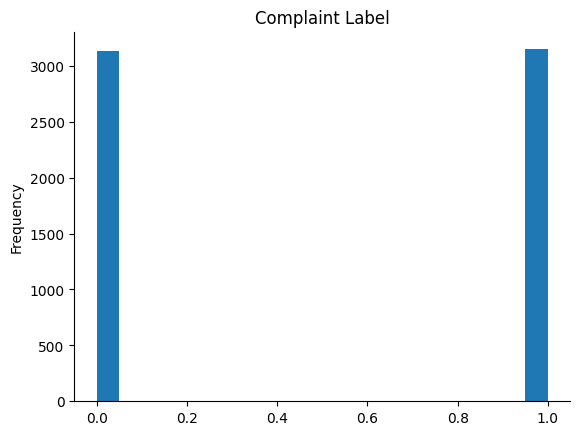

In [ ]:
df['Complaint Label'].plot(kind='hist', bins=20, title='Complaint Label')
plt.gca().spines[['top', 'right',]].set_visible(False)

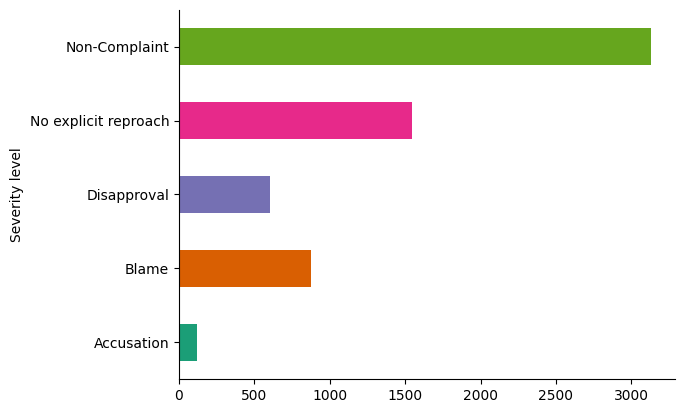

In [ ]:
df.groupby('Severity level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

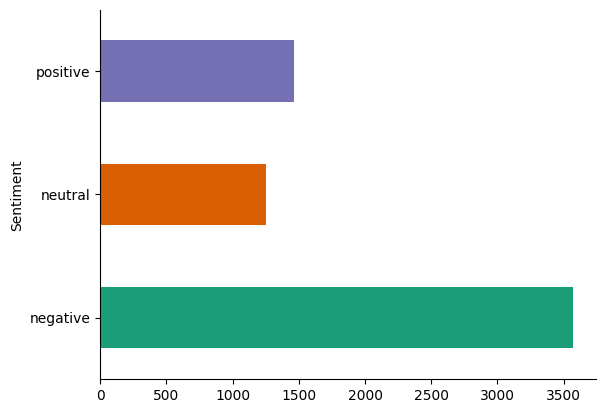

In [ ]:
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

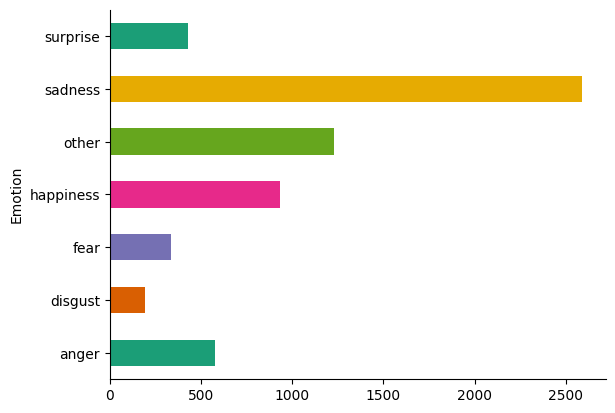

In [ ]:
df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

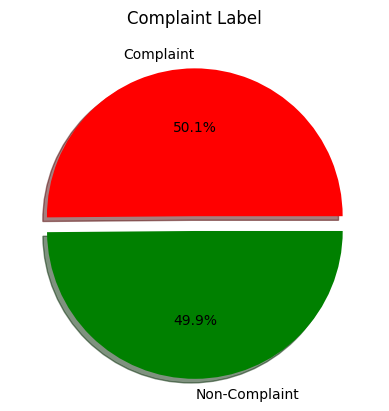

In [ ]:
plt.pie(df["Complaint Label"].value_counts(),[0,0.1],labels = ['Complaint','Non-Complaint'],autopct ='%1.1f%%',shadow = True,colors = ['red','green'],)
plt.title('Complaint Label')
plt.show()

##Text Cleansing

Removing the mentions and hashtags to efficiently summarize the sentence.

In [ ]:
import re

In [ ]:
def remove_mentions_and_hashtags(text):
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    return text

In [ ]:
df['Complaint/ Opinion'] = df['Complaint/ Opinion'].apply(remove_mentions_and_hashtags)

In [ ]:
df.head()

,Domain,Complaint/ Opinion,Complaint Label,Complaint_Cause,Severity level,Sentiment,Emotion
0,Transaction Fail,Can someone tell me if transaction fail betwee...,1,transaction fail between merchant and Bank due...,No explicit reproach,negative,sadness
1,Transaction Fail,As part of my LIC premium renewal my balanc...,1,balance deducted but payment status shows fail,No explicit reproach,negative,sadness
2,Transaction Fail,"This is something very serious nd urgent, i m...",1,not able to use imobile app,No explicit reproach,negative,anger
3,Transaction Fail,"One payment was made with my consent, th...",1,payment seems a fraud transaction,Blame,negative,anger
4,Transaction Fail,Fraud transaction through CRED for SBI C-Card ...,1,Fraud transaction through CRED,Accusation,negative,surprise


In [ ]:
df['Complaint/ Opinion'][0]

'Can someone tell me if transaction fail between merchant and Bank due to biller issue who responsibilty to contact biller?\nA bank, A merchant or customer?\n   \n\n   '

In [ ]:
df['Complaint_Cause'][8]

'Unnecessary late fee charges imposed'

##Extracting useful Features

we need to summarize the sentences in the 'Complaint/ Opinion' column to 'Complaint_Cause'. as the complaint_cause serves as the summarize sentence of the Complaint

In [ ]:
df= df.drop(columns=['Domain','Complaint_Cause','Complaint Label','Severity level','Sentiment','Emotion'],axis=1)

In [ ]:
df.head()

,Complaint/ Opinion
0,Can someone tell me if transaction fail betwee...
1,As part of my LIC premium renewal my balanc...
2,"This is something very serious nd urgent, i m..."
3,"One payment was made with my consent, th..."
4,Fraud transaction through CRED for SBI C-Card ...


##Implementation of Extractive Summarization Model (built using BERT)

###Installing necessary libraries for Extractive Summarization

In [ ]:
!pip install bert-extractive-summarizer
!pip install transformers

In [ ]:
from summarizer import Summarizer,TransformerSummarizer

In [ ]:
#initializing the extractive-bert-summarizer
bert_model = Summarizer()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

###Testing Model with a random sample

In [ ]:
len(df)

6280

In [ ]:
df['Complaint/ Opinion'][15]

' I got scammed in the name of loan. The fraud is holding a account on your bank transaction was made From \nIt was credited in .  is not supporting on this issue . please investigate and take legal action 091905003305 on fraud'

In [ ]:
bert_summary = ''.join(bert_model(df['Complaint/ Opinion'][15], min_length=15))
bert_summary

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


'I got scammed in the name of loan. please investigate and take legal action 091905003305 on fraud'

###Generating summaries of Complaints

In [ ]:
extractive_summary_results=pd.DataFrame(columns = ['Original Complaint', 'Summarized Complaint', 'Rouge Score_e'])

In [ ]:
'''
considering only for 500 entries of complaints to reduce computational time
which can be sufficient enough for evaluating the model generated summaries.
'''
extractive_summary_results['Original Complaint'] = df['Complaint/ Opinion'].iloc[:500]

In [ ]:
extractive_summary_results.head()

,Original Complaint,Summarized Complaint,Rouge Score_e
0,Can someone tell me if transaction fail betwee...,NaN,NaN
1,As part of my LIC premium renewal my balanc...,NaN,NaN
2,"This is something very serious nd urgent, i m...",NaN,NaN
3,"One payment was made with my consent, th...",NaN,NaN
4,Fraud transaction through CRED for SBI C-Card ...,NaN,NaN


In [ ]:
len(extractive_summary_results)

500

In [ ]:
import warnings

In [ ]:
#to surpress the warnings during generating summaries
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

for i in range(0,500):
  summary = ''.join(bert_model(df['Complaint/ Opinion'][i], min_length=15))
  extractive_summary_results['Summarized Complaint'][i] = summary

  if i%100==0:
    print(i,"Complaints are Summarized Successfully")
print(500,"Complaints are Summarized Successfully")

0 Complaints are Summarized Successfully
100 Complaints are Summarized Successfully
200 Complaints are Summarized Successfully
300 Complaints are Summarized Successfully
400 Complaints are Summarized Successfully
500 Complaints are Summarized Successfully


In [ ]:
extractive_summary_results

,Original Complaint,Summarized Complaint,Rouge Score_e
0,Can someone tell me if transaction fail betwee...,Can someone tell me if transaction fail betwee...,NaN
1,As part of my LIC premium renewal my balanc...,As part of my LIC premium renewal my balance d...,NaN
2,"This is something very serious nd urgent, i m...","This is something very serious nd urgent, i m ...",NaN
3,"One payment was made with my consent, th...","One payment was made with my consent, the anot...",NaN
4,Fraud transaction through CRED for SBI C-Card ...,Fraud transaction through CRED for SBI C-Card ...,NaN
...,...,...,...
495,We contacted the HDFC Rudrapur Uttarakhand br...,We contacted the HDFC Rudrapur Uttarakhand bra...,NaN
496,\n \n HDFC nodal officer serious issue to yo...,HDFC nodal officer serious issue to your notic...,NaN
497,"Hello team, I am using your credit card for ...","Hello team, I am using your credit card for ...",NaN
498,Anay..that is the complete concern. \n\nDoes ...,Anay..that is the complete concern. Does the c...,NaN


In [ ]:
extractive_summary_results['Original Complaint'][10]

"The all 3 transaction are successful even in my transaction history it shows only 1 transaction. Even I don't get any message for transaction. Worst service by Icici Bank     "

In [ ]:
extractive_summary_results['Summarized Complaint'][10]

"The all 3 transaction are successful even in my transaction history it shows only 1 transaction. Even I don't get any message for transaction."

##Abstractive Summarization Model

In [ ]:
abstractive_summary_results=pd.DataFrame(columns = ['Original Complaint', 'Summarized Complaint', 'Rouge Score_a'])

In [ ]:
'''
considering only for 500 entries of complaints to reduce computational time
which can be sufficient enough for evaluating the model generated summaries.
'''
abstractive_summary_results['Original Complaint'] = df['Complaint/ Opinion'].iloc[:500]

In [ ]:
abstractive_summary_results.head()

,Original Complaint,Summarized Complaint,Rouge Score_a
0,Can someone tell me if transaction fail betwee...,NaN,NaN
1,As part of my LIC premium renewal my balanc...,NaN,NaN
2,"This is something very serious nd urgent, i m...",NaN,NaN
3,"One payment was made with my consent, th...",NaN,NaN
4,Fraud transaction through CRED for SBI C-Card ...,NaN,NaN


In [ ]:
len(abstractive_summary_results)

500

In [ ]:
from transformers import pipeline

In [ ]:
#using Falconsai's T5 Transformer model for abstractive summarization
abstractive_summarizer = pipeline("summarization", model="Falconsai/text_summarization")

config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

###Testing with a random sample

In [ ]:
abstractive_summary_results['Original Complaint'][15]

' I got scammed in the name of loan. The fraud is holding a account on your bank transaction was made From \nIt was credited in .  is not supporting on this issue . please investigate and take legal action 091905003305 on fraud'

In [ ]:
summary = abstractive_summarizer(abstractive_summary_results['Original Complaint'][15], min_length=20, max_length=150, do_sample=False)

Your max_length is set to 150, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


In [ ]:
summary[0]['summary_text']

'The fraud is holding a account on your bank transaction was made From It was credited in . is not supporting on this issue . please investigate and take legal action 091905003305 on fraud .'

###Generating summaries of Complaints

In [ ]:
import warnings

In [ ]:
#to surpress the warnings during generating summaries
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

for i in range(0,500):
  summary = abstractive_summarizer(abstractive_summary_results['Original Complaint'][i], min_length=20, max_length=150, do_sample=False)
  abstractive_summary_results['Summarized Complaint'][i] = summary[0]['summary_text']

  if i%100==0:
    print(i,"Complaints are Summarized Successfully")


Your max_length is set to 150, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
Your max_length is set to 150, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


0 Complaints are Summarized Successfully


Your max_length is set to 150, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 150, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 150, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)
Your max_length is set to 150, but your input_length is only 72. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)
Your

100 Complaints are Summarized Successfully


Your max_length is set to 150, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)
Your max_length is set to 150, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)
Your max_length is set to 150, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 150, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
Your

200 Complaints are Summarized Successfully


Your max_length is set to 150, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 150, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)
Your max_length is set to 150, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)
Your max_length is set to 150, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)
Your

300 Complaints are Summarized Successfully


Your max_length is set to 150, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 150, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
Your max_length is set to 150, but your input_length is only 73. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)
Your max_length is set to 150, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your

400 Complaints are Summarized Successfully


Your max_length is set to 150, but your input_length is only 63. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)
Your max_length is set to 150, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)
Your max_length is set to 150, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 150, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)
Your 

In [ ]:
abstractive_summary_results.head()

,Original Complaint,Summarized Complaint,Rouge Score_a
0,Can someone tell me if transaction fail betwee...,Can someone tell me if transaction fail betwee...,NaN
1,As part of my LIC premium renewal my balanc...,I have used LIC website where my payment gatew...,NaN
2,"This is something very serious nd urgent, i m...",i m unable to use imobile app and not able to ...,NaN
3,"One payment was made with my consent, th...","One payment was made with my consent, the othe...",NaN
4,Fraud transaction through CRED for SBI C-Card ...,Fraud transaction through CRED for SBI C-Card ...,NaN


##Finding Rouge Scores for both Extractive and Abstractive models

In [ ]:
extractive_summary_results.head()

,Original Complaint,Summarized Complaint,Rouge Score_e
0,Can someone tell me if transaction fail betwee...,Can someone tell me if transaction fail betwee...,NaN
1,As part of my LIC premium renewal my balanc...,As part of my LIC premium renewal my balance d...,NaN
2,"This is something very serious nd urgent, i m...","This is something very serious nd urgent, i m ...",NaN
3,"One payment was made with my consent, th...","One payment was made with my consent, the anot...",NaN
4,Fraud transaction through CRED for SBI C-Card ...,Fraud transaction through CRED for SBI C-Card ...,NaN


In [ ]:
extractive_summary_results.drop(columns = ['Rouge Score_e'], inplace = True)

In [ ]:
extractive_summary_results.head()

,Original Complaint,Summarized Complaint
0,Can someone tell me if transaction fail betwee...,Can someone tell me if transaction fail betwee...
1,As part of my LIC premium renewal my balanc...,As part of my LIC premium renewal my balance d...
2,"This is something very serious nd urgent, i m...","This is something very serious nd urgent, i m ..."
3,"One payment was made with my consent, th...","One payment was made with my consent, the anot..."
4,Fraud transaction through CRED for SBI C-Card ...,Fraud transaction through CRED for SBI C-Card ...


In [ ]:
abstractive_summary_results.head()

,Original Complaint,Summarized Complaint,Rouge Score_a
0,Can someone tell me if transaction fail betwee...,Can someone tell me if transaction fail betwee...,NaN
1,As part of my LIC premium renewal my balanc...,I have used LIC website where my payment gatew...,NaN
2,"This is something very serious nd urgent, i m...",i m unable to use imobile app and not able to ...,NaN
3,"One payment was made with my consent, th...","One payment was made with my consent, the othe...",NaN
4,Fraud transaction through CRED for SBI C-Card ...,Fraud transaction through CRED for SBI C-Card ...,NaN


In [ ]:
abstractive_summary_results.drop(columns = ['Rouge Score_a'], inplace = True)

####ROUGE Score(Recall Oriented Understudy for Gisting Evaluation)

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 31.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=ce74a0c0ad6aff232a0abab98994581c550060ae049aa5b411f2ac2e8c506e79
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
import evaluate
rouge = evaluate.load('rouge')

####Rouge- Score of Extractive Summary

In [ ]:
extractive_rouge_score = rouge.compute(references = extractive_summary_results['Original Complaint'],
                                       predictions = extractive_summary_results['Summarized Complaint'])

In [ ]:
extractive_rouge_score

{'rouge1': 0.9060599397535989,
 'rouge2': 0.8968622060823948,
 'rougeL': 0.9058228013984411,
 'rougeLsum': 0.9060801876075538}

In [ ]:
extractive_rouge_score['rouge1'] = extractive_rouge_score['rouge1'] * 100
extractive_rouge_score['rouge2'] = extractive_rouge_score['rouge2'] * 100
extractive_rouge_score['rougeL'] = extractive_rouge_score['rougeL'] * 100
extractive_rouge_score['rougeLsum'] = extractive_rouge_score['rougeLsum'] * 100

In [ ]:
extractive_rouge_score

{'rouge1': 90.6059939753599,
 'rouge2': 89.68622060823948,
 'rougeL': 90.5822801398441,
 'rougeLsum': 90.60801876075539}

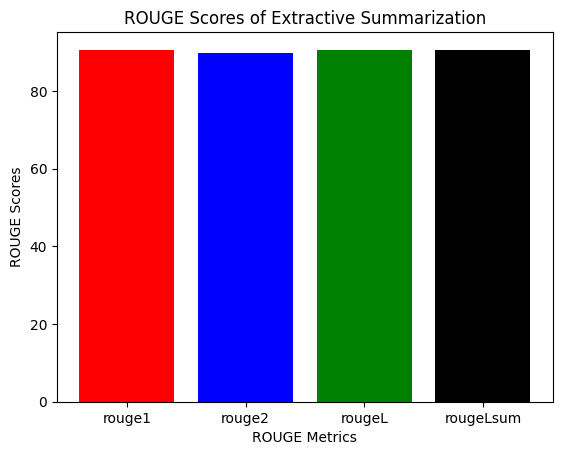

In [ ]:
plt.bar(extractive_rouge_score.keys(), extractive_rouge_score.values(), color = ['red', 'blue', 'green', 'black'],)
plt.xlabel("ROUGE Metrics")
plt.ylabel("ROUGE Scores")
plt.title("ROUGE Scores of Extractive Summarization")
plt.savefig('Extractive Summarization.jpeg')

####Rouge-Score of Abstractive Summary

In [ ]:
abstractive_rouge_score = rouge.compute(references = abstractive_summary_results['Original Complaint'],
                                        predictions = abstractive_summary_results['Summarized Complaint'])

In [ ]:
abstractive_rouge_score

{'rouge1': 0.8430283128049858,
 'rouge2': 0.8154700515077621,
 'rougeL': 0.8328233852766345,
 'rougeLsum': 0.8336145260666847}

In [ ]:
abstractive_rouge_score['rouge1'] = abstractive_rouge_score['rouge1'] * 100
abstractive_rouge_score['rouge2'] = abstractive_rouge_score['rouge2'] * 100
abstractive_rouge_score['rougeL'] = abstractive_rouge_score['rougeL'] * 100
abstractive_rouge_score['rougeLsum'] = abstractive_rouge_score['rougeLsum'] * 100

In [ ]:
abstractive_rouge_score

{'rouge1': 84.30283128049858,
 'rouge2': 81.54700515077622,
 'rougeL': 83.28233852766344,
 'rougeLsum': 83.36145260666848}

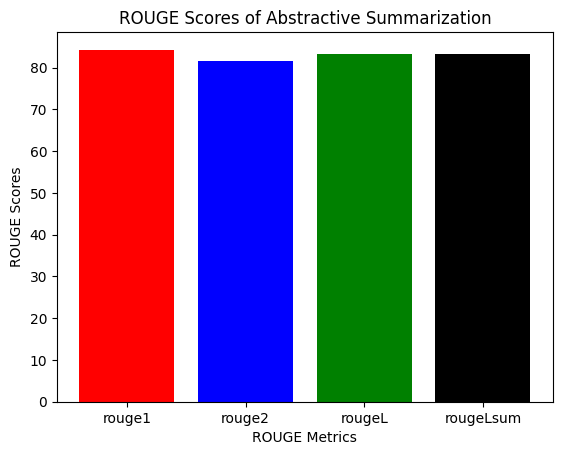

In [ ]:
plt.bar(abstractive_rouge_score.keys(), abstractive_rouge_score.values(), color = ['red', 'blue', 'green', 'black'],)
plt.xlabel("ROUGE Metrics")
plt.ylabel("ROUGE Scores")
plt.title("ROUGE Scores of Abstractive Summarization")
plt.savefig('Abstractive Summarization.jpeg')

##Q-Learning for Hybrid Extractive - Abstractive Summarization